# Building a Neural Network from scratch

Today, you'll learn how to code and train a neural network from scratch using just `numpy`.

Let's start with a toy dataset:

In [29]:
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Text(0, 0.5, 'x2')

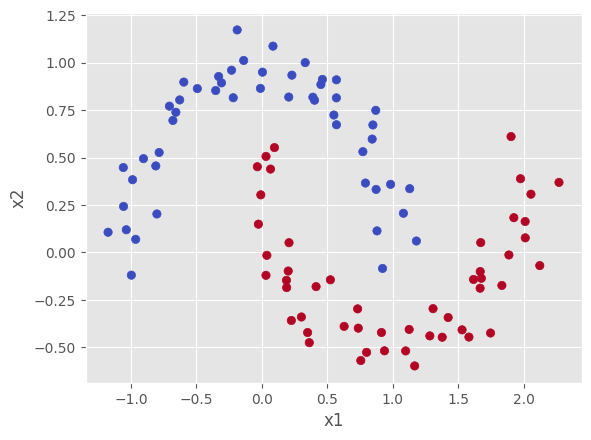

In [41]:
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')
plt.xlabel('x1')
plt.ylabel('x2')

In [31]:
y = y.reshape(-1, 1) # make y a column vector

### Questions

* How many observations does the data have?
* How many input features are there?
* Why would a simple Logistic Regression (LogReg) model perform poorly 
* How many model parameters (weights) does a LogReg model have for this task?
* How could one make a logistic regression perform better



### Fitting a linear model

we need:

1. A prediction function that maps the input `X` to the output `y`: $\hat{y} = F(X;w)$
2. A loss function that evaluates the goodness of fit: $L(y, \hat{y})$
3. Training data that is used to find the weights `w` that minimize the loss function.
4. Separate validation data that is used to assess the model's performance on unseen data.
5. The Gradient Descent Algorithm:

    $$
    w_{new} = w_{old} - LR \cdot \nabla_{L_{Loss}}(w)
    $$

### Let's start with a Log Reg model!

$$
F(X) = sigmoid(w_01 + w_1X_1 + w_2X_2) = sigmoid(Xw)
$$

In [43]:
# add a column of ones to the input data

def add_bias(X):
    return np.hstack([X, np.ones((X.shape[0], 1))])

X = add_bias(X)

# a model parameter for each column
assert X.shape[1] == 3

In [44]:
# initialize three random weights from the normal distribution
w = np.random.normal(size=3)
w

array([-0.67353647, -1.59729146, -1.41261218])

In [34]:
# calculate the linear combination between the input and the weights with a DOT product
# X[:,0]*w[0] + X[:,1]*w[1] + X[:,2]*w[2]
X.dot(w) # One number for each datapoint

array([ 0.07972072,  2.11959774,  0.5541656 ,  3.76790887, -1.2669683 ,
        4.25591578,  0.09447632, -0.3686289 ,  0.62572521, -1.40971817,
        0.51047146,  2.09980595,  2.30014794,  1.41864952,  1.7782918 ,
        1.27209742,  2.96304273,  4.17198172,  4.23125001, -0.64847453,
        1.41282514, -0.44410596, -2.2003216 ,  1.04982347,  0.54386746,
        1.79554221,  3.54014878,  0.11175557,  1.27058607,  1.72438681,
        0.47394906,  1.04397562,  1.58910909,  1.90412955, -2.18680537,
        2.25076763,  3.20824615,  1.36506687, -2.01642634,  2.38942779,
        0.78874545, -2.19874289, -1.41112063,  4.34839272, -1.8298514 ,
        1.35161372,  3.41805576, -0.26939392,  0.30278364,  2.20222129])

In [45]:
# calculate the sigmoid non linear transformation
def sigmoid(a):
    return 1 / (1 + np.exp(-a))
    
a = np.array([-10.0, -1.0, 0.0, 1.0, 10.0])
expected = np.array([0.0, 0.27, 0.5, 0.73, 1.0])
assert np.all(sigmoid(a).round(2) == expected)

In [46]:
# calculate the log loss (aka binary crossentropy)
def log_loss(y, y_pred):
    return np.abs( - ((y * np.log(y_pred)) + ((1-y) * np.log(1- y_pred))))

a = np.array([0.0, 0.0, 1.0, 1.0])
b = np.array([0.01, 0.99, 0.01, 0.99])
expected = np.array([0.01, 4.61, 4.61, 0.01])
assert np.all(log_loss(a, b).round(2) == expected)

In [47]:
# predictions of a log reg model
y_pred = sigmoid(X.dot(w))
y_pred

array([0.14603222, 0.10352676, 0.21900071, 0.25199415, 0.23216484,
       0.10266582, 0.0542315 , 0.16417863, 0.04492317, 0.13024004,
       0.04827027, 0.06470502, 0.22376661, 0.07984827, 0.0473349 ,
       0.06237622, 0.17909141, 0.21017592, 0.053593  , 0.06711323,
       0.16346775, 0.08547641, 0.05810532, 0.2043587 , 0.17724439,
       0.03991369, 0.16902135, 0.04618116, 0.05839039, 0.26656456,
       0.03936928, 0.28788786, 0.12882455, 0.04077158, 0.06110054,
       0.0737318 , 0.27409306, 0.19718473, 0.09337757, 0.03736265,
       0.36592041, 0.07875141, 0.07380676, 0.0359979 , 0.0578505 ,
       0.03793797, 0.14289455, 0.0389503 , 0.25482596, 0.04322916,
       0.05047591, 0.07793098, 0.04905236, 0.11249788, 0.05048737,
       0.13935749, 0.06609744, 0.28958503, 0.10434337, 0.08505278,
       0.16325445, 0.02483948, 0.08629073, 0.1956091 , 0.09604148,
       0.22905078, 0.31194055, 0.19299255, 0.19911557, 0.02844098,
       0.17152948, 0.16872107, 0.22367357, 0.29451759, 0.03343

---
# Neural Network

We build a Neural Net with 

- one hidden layer that contains 3 "neurons"/ units
- one output layer with 1 unit
- a `sigmoid` **activation** function

$$
\hat{y} = F(X; w_h, w_o) = act(act(Xw_h)w_o)
$$

In [38]:
# how can we calculate the output of several LogReg models at the same time? 
# this is the first layer of a neural net!

weights = []

weights.append(np.random.normal(size=(3, 2))) # 3 model parameters for each units/neurons

# output layer: last layer of the network
# binary classification = one unit
weights.append(np.random.normal(size=(3, 1)))

weights

[array([[ 1.21250531,  0.19688727],
        [ 1.57645778,  0.77107067],
        [ 0.6962944 , -0.75502197]]),
 array([[1.16197714],
        [0.19359223],
        [0.57517183]])]

In [48]:
# output of the first layer: stacked output of three logistic regressions 
X_hidden = sigmoid(X.dot(weights[0]))
X_hidden.shape

(100, 2)

In [49]:
# feed the output of the first hidden layer into a second layer! this is an ordinary logistic regression.

# add a bias
X_hidden_with_bias = add_bias(X_hidden)

# calculate the final output of the network
ypred = sigmoid(X_hidden_with_bias.dot(weights[1]))

### The feed forward function

In [53]:
def feed_forward(X, weights):
   """
   1. Calculate the dot product of X
      and the weights of the first layer.

   2. Apply the sigmoid function on the result.

   3. Append an extra column of ones to the result (i.e. the bias).

   4. Calculate the dot product of the previous step
      with the weights of the second (i.e. outer) layer.

   5. Apply the sigmoid function on the result.

   6. Return all intermediate results (i.e. anything that is outputted
      by an activation function).
   """ 
    
   X_hidden = sigmoid(X.dot(weights[0])) # first layer

   X_hidden_with_bias = add_bias(X_hidden) # add bias

   ypred = sigmoid(X_hidden_with_bias.dot(weights[1])) # output layer
   
   return X_hidden, ypred

In [58]:
# initialize some random weights

weights = [
    np.random.normal(size=(3, 2)),
    np.random.normal(size=(3, 1))
]

# testing 

out1, out2 = feed_forward(X, weights)

assert out1.shape == (100, 2)
assert out2.shape == (100, 1)

Xref = np.array([[1.0, 2.0, 1.0]])

out1, out2 = feed_forward(Xref, weights)

In [60]:
out2

array([[0.27507404]])

In [ ]:
sum(log_loss(y, out2))

array([1.29071498, 1.29071498, 1.29071498, 0.32168576, 0.32168576,
       0.32168576, 0.32168576, 1.29071498, 0.32168576, 0.32168576,
       0.32168576, 0.32168576, 1.29071498, 0.32168576, 1.29071498,
       0.32168576, 1.29071498, 1.29071498, 0.32168576, 0.32168576,
       1.29071498, 1.29071498, 0.32168576, 0.32168576, 1.29071498,
       0.32168576, 0.32168576, 1.29071498, 0.32168576, 1.29071498,
       0.32168576, 0.32168576, 1.29071498, 0.32168576, 1.29071498,
       0.32168576, 1.29071498, 1.29071498, 0.32168576, 0.32168576,
       0.32168576, 0.32168576, 0.32168576, 1.29071498, 0.32168576,
       0.32168576, 1.29071498, 0.32168576, 1.29071498, 0.32168576,
       0.32168576, 0.32168576, 0.32168576, 0.32168576, 0.32168576,
       1.29071498, 0.32168576, 1.29071498, 0.32168576, 1.29071498,
       1.29071498, 1.29071498, 1.29071498, 0.32168576, 1.29071498,
       1.29071498, 0.32168576, 1.29071498, 1.29071498, 1.29071498,
       1.29071498, 0.32168576, 1.29071498, 0.32168576, 1.29071

# The Backpropagation algorithm

http://krspiced.pythonanywhere.com/chapters/project_deep_learning/neural_networks/backpropagation.html

In [61]:
def sigmoid_deriv(X):
   """derivative of sigmoid with respect to X"""
   return sigmoid(X) * (1-sigmoid(X))

In [62]:
def log_loss_deriv(ytrue, ypred):
    loss_deriv = -(ytrue/ypred - ((1-ytrue)/(1-ypred)))  #transcribe the formula above
    return loss_deriv

In [63]:
def backprop(weights,
             output1,
             output2,
             ytrue,
             X_input,
             LR):

    wH = weights[0]
    wO = weights[1]

    '''EQUATION A:'''
    loss_gradient = log_loss_deriv(ytrue , output2)

    '''EQUATION B:'''
    # don't forget the bias!
    hidden_out_with_bias = add_bias(output1)
    # derivative of the sigmoid function with respect to the
    # hidden output * weights
    sig_deriv_1 = sigmoid_deriv(hidden_out_with_bias.dot(wO))

    y_grad = sig_deriv_1 * loss_gradient

    '''EQUATION C:'''
    delta_wo = -np.dot( y_grad.T, hidden_out_with_bias ) * LR

    #and finally, old weights + delta weights -> new weights!
    wO_new = wO + delta_wo.T

    '''EQUATION D:'''
    sig_deriv_2 = sigmoid_deriv( X_input.dot(wH) )
    #exclude the bias (last column) of the outer weights,
    #since it is not backpropagated!
    H_grad = sig_deriv_2  * np.dot(y_grad , wO[:-1].T)

    '''EQUATION E:'''
    delta_wH = -np.dot(H_grad.T, X_input ) * LR

    #old weights + delta weights -> new weights!
    wH_new = wH + delta_wH.T

    # new hidden weights, new output weights
    return wH_new, wO_new

In [104]:
# setup
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)
X = add_bias(X)
y = y.reshape(-1, 1)
weights = [
   np.random.normal(size=(3, 4)),
   np.random.normal(size=(5, 1))
]

# train
history = []
LR = 0.01

for i in range(5000):
      out1, out2 = feed_forward(X, weights)
      loss = sum(log_loss(y, out2))
      history.append(sum(log_loss(y, out2)))
      weights = backprop(weights, out1, out2, y, X, LR)


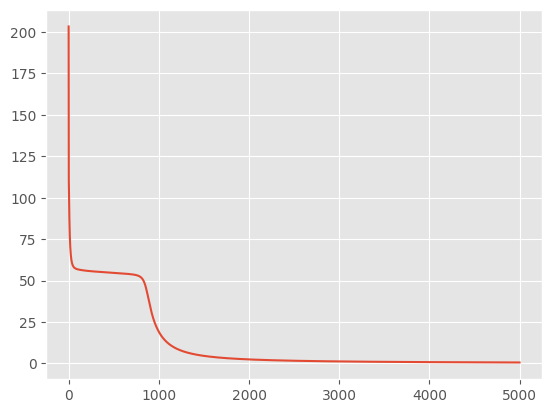

In [105]:
plt.plot(history)

In [106]:
sum(out2.round() == y) / y.shape[0]

array([1.])

## Extra: Visualizing the decision boundary

The decision boundary looks random as we have not trained our neural network yet!

In [107]:
# create a grid of values
x = np.linspace(-3, 3, 200)
X_vis = np.array([(x1, x2) for x1 in x for x2 in x])
# add the bias column
X_vis = add_bias(X_vis)

# calculate the (random) predictions
_, y_pred = feed_forward(X_vis, weights)

In [108]:
# reshape the predictions for visualization
Z = y_pred.reshape((len(x), len(x)), order='F')

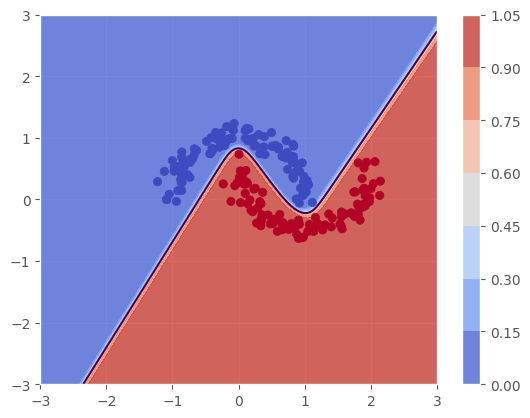

In [109]:
# draw a contour plot
fig,ax=plt.subplots(1,1)
cp = ax.contourf(x, x, Z, alpha=0.8, cmap='coolwarm')
ax.contour(x, x, Z, levels=[0.5])
fig.colorbar(cp) # Add a colorbar to a plot

# draw the original data
ax.scatter(X[:,0], X[:,1], c=y.flatten(), cmap='coolwarm')